In [5]:
import pandas as pd
import pyarrow as py
import numpy as np
print (np.__version__)
print(pd.__version__)
print(py.__version__)

1.19.5
1.3.3
5.0.0


In [11]:
parquet_file1 = "../basic-market-cva/outputs/0f7d1509-1996-400d-b086-98ac43989a86/runs/root__system__Agents__PricingDesk/run000.parquet"
parquet_file2 = "../basic-market-cva/outputs/8dce2a88-21b5-4644-b290-86c068103229/runs/root__system__Agents__PricingDesk/run000.parquet"
parquet_file3 = "../basic-market-cva/outputs/4388fb36-b80f-42f6-aa1a-c48dbda20de4/runs/root__system__Agents__PricingDesk/run000.parquet"

In [7]:
tempdf = pd.read_parquet(parquet_file, engine='pyarrow')
data = tempdf.to_numpy().flatten().tolist()
df = pd.DataFrame(data)
pd.DataFrame(data)


,cvaPercent,numberOfAssets,price,totalMoney,totalValue,valueAtRisk,_id,seed,tick
0,0.0,100.0,9.9,0.0,0.0,0.0,6,83913035857800,0
1,0.1987007234000945,100.0,9.925,0.0,0.5200000000000073,4.036973374190062,6,83913035857800,1
2,0.2629233301148964,100.0,9.975000000000001,0.0,2.489604236980851,5.478041242456056,6,83913035857800,2
3,0.2161407401437984,100.0,10.05,0.0,5.938041622745348,3.976937050651136,6,83913035857800,3
4,0.20792951507619814,100.0,10.05,0.0,7.5173051116161576,4.295031870800399,6,83913035857800,4
...,...,...,...,...,...,...,...,...,...
96,0.41099805520936644,109.0,9.774999999999995,-30.881541320388315,2.9233484612209306,18.776013807384643,6,83913035857800,96
97,0.46504414819571577,110.0,9.799999999999995,-40.731299329134515,0.5933794040521834,17.009846922987947,6,83913035857800,97
98,0.4657808794053464,110.0,9.774999999999995,-40.631299329134514,4.188764050589194,16.374257718946392,6,83913035857800,98
99,0.538027833953376,113.0,9.799999999999995,-70.08956819154693,1.4762304212852717,16.226856628747072,6,83913035857800,99


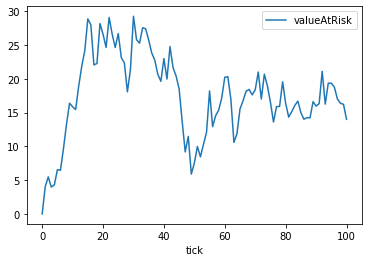

In [8]:
df=df.astype(float)
df.plot(x ='tick', y='valueAtRisk', kind = 'line')

In [9]:
def get_dataframe(file):
    tempdf = pd.read_parquet(file, engine='pyarrow')
    return pd.DataFrame(tempdf.to_numpy().flatten().tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cvaPercent      101 non-null    float64
 1   numberOfAssets  101 non-null    float64
 2   price           101 non-null    float64
 3   totalMoney      101 non-null    float64
 4   totalValue      100 non-null    float64
 5   valueAtRisk     101 non-null    float64
 6   _id             101 non-null    float64
 7   seed            101 non-null    float64
 8   tick            101 non-null    float64
dtypes: float64(9)
memory usage: 7.2 KB


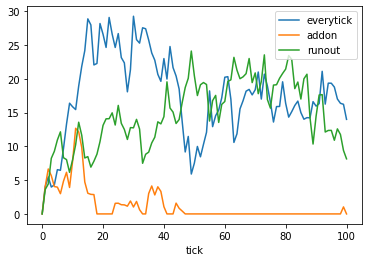

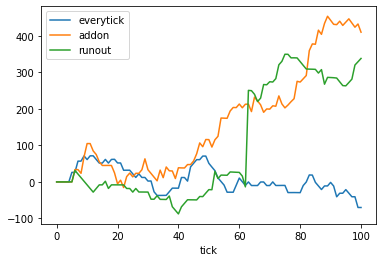

In [16]:
df1 = get_dataframe(parquet_file1)
df2 = get_dataframe(parquet_file2).astype(float)
df3 = get_dataframe(parquet_file3).astype(float)
df1 = df1.astype(float)

df1.info()

ax1=df1.plot(x ='tick', y='valueAtRisk', label='everytick', kind = 'line')
df2.plot(x ='tick', y='valueAtRisk',label='addon',ax=ax1)
df3.plot(x ='tick', y='valueAtRisk',label='runout',ax=ax1)

ax2=df1.plot(x ='tick', y='totalMoney', label='everytick', kind = 'line')
df2.plot(x ='tick', y='totalMoney',label='addon',ax=ax2)
df3.plot(x ='tick', y='totalMoney',label='runout',ax=ax2)